<h1 style='color: blue'>K-Means Clustering</h1>

<p>K-Means Clustering means, grouping the Number of data points togeather and predict the answer.</p>

<h3 style='color: purple'>Grouping Cluster</h3>

<div align='center'>
    <img src='clustering.png' width=500>
</div>

<p>Grouping the cluster, we need to pass the n_cluster in the K-Means model, to that we need to <b>find out</b> the number of cluster which are suitable in the dataset</p>

<div align='center'>
    <img src='grouping1.png' width=500>
</div>

<div align='center'>
    <img src='grouping2.png' width=500>
</div>

<div align='center'>
    <img src='grouping3.png' width=500>
</div>

<br>
<p><i>to find out clusters we can find the which Number is suitable, to do that <b>Sum Of Square Methods</b></i></p>

<h3 style='color: red'>We can say there are N Clusters</h3>


<div align='center'>
    <img src='n_clusters.png' width=500>
</div>

**with the help of Elbow Technique, we can find the error, so that we need** to find the *Sum Of Square Methods.* 

<div align='center'>
    <img src='error.png' width=500>
</div>

<h3 style='color: red'>Elbow Technique</h3>

<div align='center'>
    <img src='elbowtechnique.png' width=500>
</div>



In [14]:
# importing the model
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
dataset = pd.read_csv('income.csv')
dataset.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [11]:
# getting x and y datas

x = dataset.Age
y = dataset['Income($)']

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

### Finding  the Age and Income Relation

**Through** *graph*

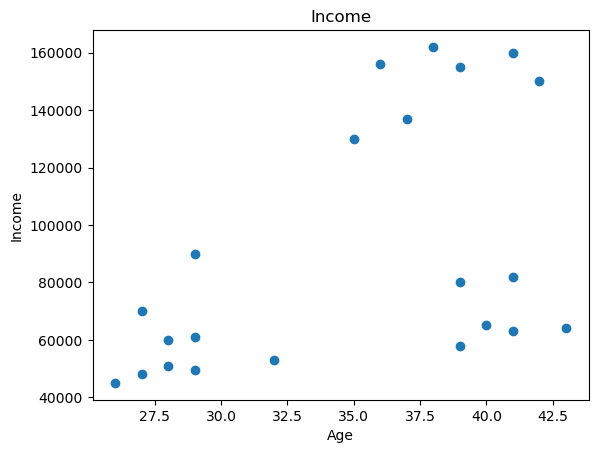

In [12]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income')

plt.scatter(x, y)
plt.show()

As per this graph we can say, these has three clusters, 

In [16]:
# creating the model
model = KMeans(n_clusters=3)   # n clusters is set to three, acording to graph
model.fit(x, y)
y_predicted = model.predict(x)

In [18]:
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1])

In [19]:
new_dataset = dataset
new_dataset['cluster'] = y_predicted.reshape(-1, 1)
new_dataset.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [20]:
# graphical representation with the clusters
group0 = new_dataset[new_dataset.cluster==0]
group1 = new_dataset[new_dataset.cluster==1]
group2 = new_dataset[new_dataset.cluster==2]

[]

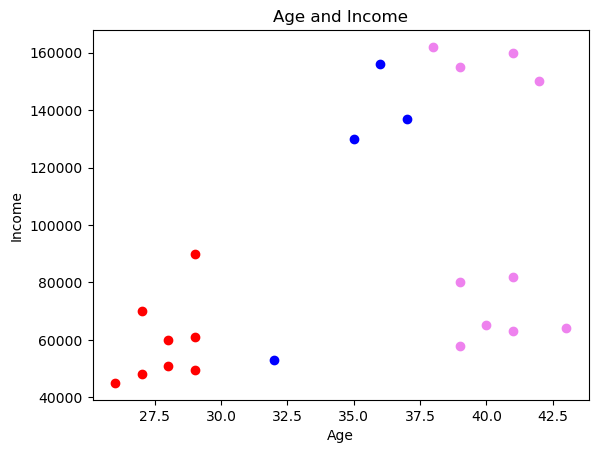

In [22]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income')

plt.scatter(group0['Age'], group0['Income($)'], color='blue')
plt.scatter(group1['Age'], group1['Income($)'], color='violet')
plt.scatter(group2['Age'], group2['Income($)'], color='red')

plt.plot()

Why This happen?

**note** : *these graph y axis has range from 40000 to 160000*, so this deviation will make a graph and model bad prediction, to solve this scale the axis properly, 

### Centroid of the Clusters

In [41]:
model.cluster_centers_

array([[35.   ],
       [40.3  ],
       [27.875]])

### Plotting the Graph with the Centroid

[]

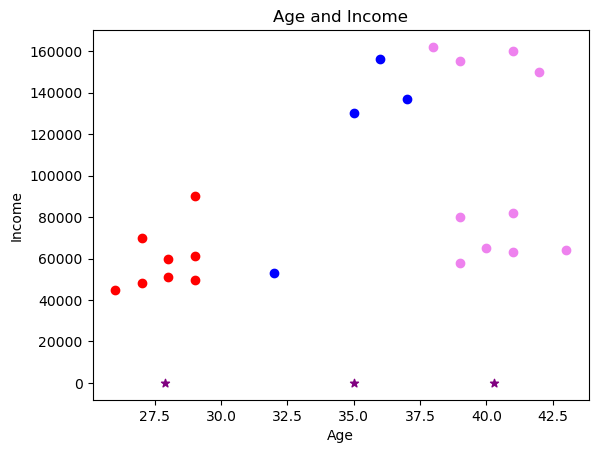

In [44]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income')

plt.scatter(group0['Age'], group0['Income($)'], color='blue')
plt.scatter(group1['Age'], group1['Income($)'], color='violet')
plt.scatter(group2['Age'], group2['Income($)'], color='red')

plt.scatter(model.cluster_centers_, model.cluster_centers_, color='purple', marker='*')

plt.plot()

so, the model predicted as the grouping perpendicularly as 3 points.

### Scaling the Dataset

In [46]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(x)
new_dataset['Age'] = scaler.transform(x)
new_dataset

,Name,Age,Income($),cluster
0,Rob,0.058824,70000,2
1,Michael,0.176471,90000,2
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,1
5,Gautam,0.764706,155000,1
6,David,0.882353,160000,1
7,Andrea,0.705882,162000,1
8,Brad,0.588235,156000,0
9,Angelina,0.529412,130000,0


In [50]:
scaler.fit(y)
new_dataset['Income($)'] = scaler.transform(y)
new_dataset

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


Generating new `x` and `y`

In [53]:
x = new_dataset['Age']
y = new_dataset['Income($)']

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [54]:
model = KMeans(n_clusters=3)
model.fit(x, y)

KMeans(n_clusters=3)

In [55]:
y_predicted = model.predict(y)

In [56]:
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
new_dataset = dataset
new_dataset['cluster'] = y_predicted.reshape(-1, 1)
new_dataset.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [58]:
# graphical representation with the clusters
group0 = new_dataset[new_dataset.cluster==0]
group1 = new_dataset[new_dataset.cluster==1]
group2 = new_dataset[new_dataset.cluster==2]

[]

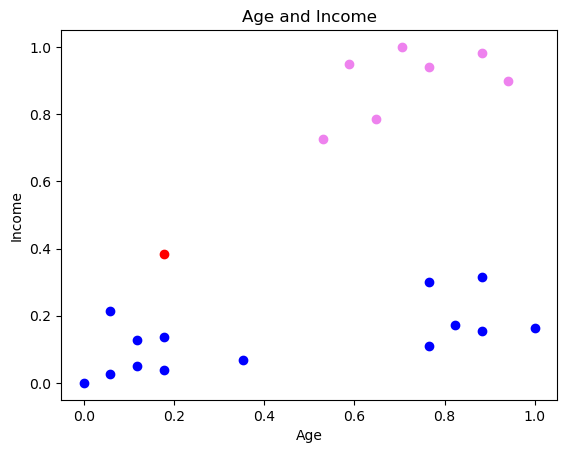

In [60]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income')

plt.scatter(group0['Age'], group0['Income($)'], color='blue')
plt.scatter(group1['Age'], group1['Income($)'], color='violet')
plt.scatter(group2['Age'], group2['Income($)'], color='red')

plt.plot()

## Error Reduction

#### Elbow Graph

In [61]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(new_dataset[['Age','Income($)']])
    sse.append(km.inertia_)

In [62]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.1685851223602976,
 0.1327661931978319,
 0.10383752586603562]

In [69]:
x = np.arange(1, 10).reshape(-1, 1)
y = np.array(sse).reshape(-1, 1)

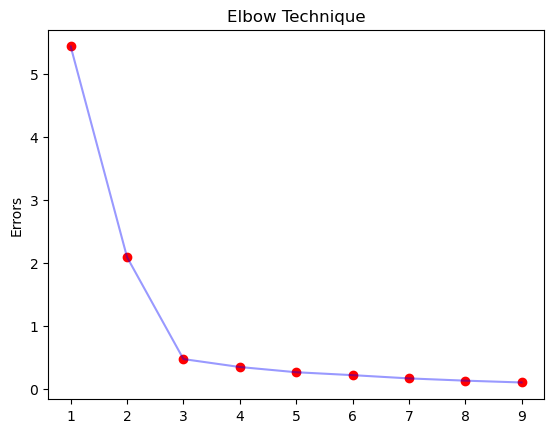

In [71]:
plt.title('Elbow Technique')
plt.ylabel('Errors')

plt.scatter(x, y, color='red')
plt.plot(x, y, color='blue', alpha=0.4)

plt.show()

The elboe point the graph is `3`